# Project Description:

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

***We need to predict whether a customer will leave the bank soon.*** We have the data on clients’ past behavior and termination of contracts with the bank.

We will find one machine learning model with the maximum possible F1  score to make the predictions.

**Features:**

*RowNumber*  — data string index 

*CustomerId*  — unique customer identifier 

*Surname*  — surname

*CreditScore*  — credit score

*Geography*  — country of residence 

*Gender*  — gender

*Age*  — age

*Tenure*  — period of maturation for a customer’s fixed deposit (years) 

*Balance*  — account balance

*NumOfProducts*  — number of banking products used by the customer 

*HasCrCard*  — customer has a credit card

*IsActiveMember*  — customer’s activeness EstimatedSalary  — estimated salary

**Target:**

*Exited*  — сustomer has left

## 1. Overview of the data

In [1]:
# Necessary Packages 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# Drop duplicates
data.drop_duplicates(inplace = True)

In [5]:
# Look into the column with missing data
print('Tenure')
print('mean:', data['Tenure'].mean())
print('median:', data['Tenure'].median())
print('std:', data['Tenure'].std())
print('max:', data['Tenure'].max())
print('min:', data['Tenure'].min())

Tenure
mean: 4.997690023099769
median: 5.0
std: 2.894723234821264
max: 10.0
min: 0.0


In [6]:
# Mean and median of the values are close to each other
# We can choose either of mean or median to fill in the missing values
data['Tenure'].fillna(value = data['Tenure'].median(), inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Description:**

Here we replace the missing values of Tenure with median value.

## 2. Features & Target

In [7]:
# RowNumber, CustomerId and Surname are not relevant to the prediction, we can exclude them
data.drop(['RowNumber', 'CustomerId' ,'Surname'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 937.5+ KB


In [8]:
# Transform categorical features into numerical features (Geography & Gender)
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(5)
memory usage: 830.1 KB


In [9]:
# Features and Target
features = data.drop(['Exited'], axis = 1)
target = data['Exited']

In [10]:
# Look into the imbalance classes
print('Number of Exited :', target.sum())    
print('Others :', target.count() - target.sum())

Number of Exited : 2037
Others : 7963


**Description**

It seems that in the data there are much more people who didn't exit than those who did. So the original data is not balanced.

The number of **0s** is approximatly *4 times* that of **1s**.

## 3. Training with imbalaced data

In [11]:
# Split the features and target into train, valid and test sets
features_train_valid, features_test, target_train_valid, target_test = train_test_split(features, target,
                                                              test_size=0.25, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, target_train_valid,
                                                              test_size=0.25, random_state=12345)

### 3.1 DecisionTreeClassifier

In [12]:
# DecisionTreeClassifier
for i in range(6, 16):
    # Train the models of different max_depth values with training set
    model = DecisionTreeClassifier(random_state = 12345, max_depth = i)
    model.fit(features_train, target_train)
    # check the models of different max_depth values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('max_depth =', i)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()

max_depth = 6
F1 score based on validation set: 0.5652173913043478
AUC-ROC Score : 0.835889808132371

max_depth = 7
F1 score based on validation set: 0.5657237936772047
AUC-ROC Score : 0.8403018834712199

max_depth = 8
F1 score based on validation set: 0.5766871165644172
AUC-ROC Score : 0.8269785249075867

max_depth = 9
F1 score based on validation set: 0.5807453416149069
AUC-ROC Score : 0.8085944375990143

max_depth = 10
F1 score based on validation set: 0.5752212389380531
AUC-ROC Score : 0.7818482661503257

max_depth = 11
F1 score based on validation set: 0.5689900426742532
AUC-ROC Score : 0.7790802675585284

max_depth = 12
F1 score based on validation set: 0.5571030640668524
AUC-ROC Score : 0.7593434254532652

max_depth = 13
F1 score based on validation set: 0.5471447543160691
AUC-ROC Score : 0.7387026931878189

max_depth = 14
F1 score based on validation set: 0.5383615084525358
AUC-ROC Score : 0.7231191691603591

max_depth = 15
F1 score based on validation set: 0.5340314136125656
A

In [13]:
# Choose max_depth = 9 as the final model to be tested
model_DecisionTree =  DecisionTreeClassifier(random_state = 12345, max_depth = 9)
model_DecisionTree.fit(features_train_valid, target_train_valid)
# Test its recall and precision metrix with testing set
predict_test = model_DecisionTree.predict(features_test)
print('DecisionTreeClassifier')
f1 = f1_score(target_test, predict_test)
probabilities_test = model_DecisionTree.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('F1 score based on test set:', f1)
print('AUC-ROC Score :', auc_roc)

DecisionTreeClassifier
F1 score based on test set: 0.5504587155963303
AUC-ROC Score : 0.8034605597964376


### 3.2 RandomForestClassifier

In [14]:
# RandomForestClassifier
for i in range(1, 11):
    # Train the models of different n_estimators values with training set
    model = RandomForestClassifier(random_state = 12345, n_estimators = i * 10)
    model.fit(features_train, target_train)
    # check the models of different n_estimators values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('n_estimators =', i * 10)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()

n_estimators = 10
F1 score based on validation set: 0.5439739413680781
AUC-ROC Score : 0.818523147333216

n_estimators = 20
F1 score based on validation set: 0.5648604269293924
AUC-ROC Score : 0.8390529836296426

n_estimators = 30
F1 score based on validation set: 0.5742251223491027
AUC-ROC Score : 0.849307340256997

n_estimators = 40
F1 score based on validation set: 0.5770491803278688
AUC-ROC Score : 0.8516352754796691

n_estimators = 50
F1 score based on validation set: 0.5718954248366013
AUC-ROC Score : 0.8531279704277417

n_estimators = 60
F1 score based on validation set: 0.567699836867863
AUC-ROC Score : 0.8560579123393769

n_estimators = 70
F1 score based on validation set: 0.565359477124183
AUC-ROC Score : 0.8574942791762015

n_estimators = 80
F1 score based on validation set: 0.5644371941272431
AUC-ROC Score : 0.8580153142052456

n_estimators = 90
F1 score based on validation set: 0.568144499178982
AUC-ROC Score : 0.8594490406618553

n_estimators = 100
F1 score based on valid

In [15]:
# Specify the n_estimators = 90
for i in range(6, 16):
    # Train the models of different max_depth values with training set
    model = RandomForestClassifier(random_state = 12345, n_estimators = 90, max_depth = i)
    model.fit(features_train, target_train)
    # check the models of different max_depth values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('n_estimators = 90')
    print('max_depth =', i)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()

n_estimators = 90
max_depth = 6
F1 score based on validation set: 0.48030018761726073
AUC-ROC Score : 0.8660042246083437

n_estimators = 90
max_depth = 7
F1 score based on validation set: 0.5223613595706619
AUC-ROC Score : 0.8696409082907939

n_estimators = 90
max_depth = 8
F1 score based on validation set: 0.5422535211267605
AUC-ROC Score : 0.869616264742123

n_estimators = 90
max_depth = 9
F1 score based on validation set: 0.5479452054794521
AUC-ROC Score : 0.870007041013906

n_estimators = 90
max_depth = 10
F1 score based on validation set: 0.5519591141396933
AUC-ROC Score : 0.8681975004400633

n_estimators = 90
max_depth = 11
F1 score based on validation set: 0.5680272108843538
AUC-ROC Score : 0.8654814293258228

n_estimators = 90
max_depth = 12
F1 score based on validation set: 0.5647058823529412
AUC-ROC Score : 0.8650660095053687

n_estimators = 90
max_depth = 13
F1 score based on validation set: 0.5681063122923588
AUC-ROC Score : 0.8646673120929416

n_estimators = 90
max_depth =

In [16]:
# Choose n_estimators = 90, max_depth = 14 as the final model to be tested
model_RandomForest =  RandomForestClassifier(random_state = 12345, n_estimators = 90, max_depth = 14)
model_RandomForest.fit(features_train_valid, target_train_valid)
# Test its recall and precision metrix with testing set
predict_test = model_RandomForest.predict(features_test)
print('RandomForestClassifier')
f1 = f1_score(target_test, predict_test)
probabilities_test = model_RandomForest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('F1 score based on test set:', f1)
print('AUC-ROC Score :', auc_roc)

RandomForestClassifier
F1 score based on test set: 0.5635491606714629
AUC-ROC Score : 0.8524848398373402


### 3.3 LogisticRegression

In [17]:
# LogisticRegression
for method in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    # Train the models of different solver values with training set
    model = LogisticRegression(random_state = 12345, solver = method)
    model.fit(features_train, target_train)
    # check the models of different solver values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('solver =', method)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()    

solver = newton-cg
F1 score based on validation set: 0.3107569721115538
AUC-ROC Score : 0.7790107375462068

solver = lbfgs
F1 score based on validation set: 0.10232558139534884
AUC-ROC Score : 0.6884932230241154

solver = liblinear
F1 score based on validation set: 0.09389671361502347
AUC-ROC Score : 0.6982221439887344

solver = sag
F1 score based on validation set: 0.0
AUC-ROC Score : 0.4906829783488822

solver = saga
F1 score based on validation set: 0.0
AUC-ROC Score : 0.4737282168632283



In [18]:
# Choose solver = newton-cg as the final model to be tested
model_LogisticRegression =  LogisticRegression(random_state = 12345, solver = 'newton-cg')
model_LogisticRegression.fit(features_train_valid, target_train_valid)
# Test its recall and precision metrix with testing set
predict_test = model_LogisticRegression.predict(features_test)
print('LogisticRegression')
f1 = f1_score(target_test, predict_test)
probabilities_test = model_LogisticRegression.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('F1 score based on test set:', f1)
print('AUC-ROC Score :', auc_roc)    

LogisticRegression
F1 score based on test set: 0.2921985815602837
AUC-ROC Score : 0.7516938955078358


**Description**

When trained with **imbalanced** data, among all the models above, the ***RandomForestClassifier*** model with *random_state = 12345*, *n_estimators = 90* and *max_depth = 14* has the highest **F1 Score (0.5680473372781064)** based on test set.

## 4. Training with balaced data (Upsampling)

In [19]:
# Upsampling those who exited
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

features_train_1, target_train_1 = upsample(features_train, target_train, repeat = 4)

In [20]:
# Look into the imbalance classes
print('Number of Exited :', target_train_1.sum())    
print('Others :', target_train_1.count() - target_train_1.sum())

Number of Exited : 4488
Others : 4503


**Description**

Now the 2 classes are more balanced.

### 4.1 DecisionTreeClassifier

In [21]:
# DecisionTreeClassifier
for i in range(6, 16):
    # Train the models of different max_depth values with training set
    model = DecisionTreeClassifier(random_state = 12345, max_depth = i)
    model.fit(features_train_1, target_train_1)
    # check the models of different max_depth values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('max_depth =', i)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()

max_depth = 6
F1 score based on validation set: 0.5759059745347698
AUC-ROC Score : 0.8453230065129379

max_depth = 7
F1 score based on validation set: 0.5687203791469194
AUC-ROC Score : 0.8417901777856012

max_depth = 8
F1 score based on validation set: 0.5695931477516061
AUC-ROC Score : 0.8172689667312092

max_depth = 9
F1 score based on validation set: 0.5496031746031746
AUC-ROC Score : 0.7987229361027988

max_depth = 10
F1 score based on validation set: 0.5675392670157068
AUC-ROC Score : 0.7896250660095054

max_depth = 11
F1 score based on validation set: 0.5267576075550893
AUC-ROC Score : 0.7563316317549726

max_depth = 12
F1 score based on validation set: 0.5138592750533049
AUC-ROC Score : 0.7437827847209998

max_depth = 13
F1 score based on validation set: 0.5253456221198156
AUC-ROC Score : 0.7353661327231122

max_depth = 14
F1 score based on validation set: 0.5203252032520325
AUC-ROC Score : 0.7226174969195563

max_depth = 15
F1 score based on validation set: 0.5249406175771971


In [22]:
# Choose max_depth = 6 as the final model to be tested
model_DecisionTree =  DecisionTreeClassifier(random_state = 12345, max_depth = 6)
model_DecisionTree.fit(features_train_1, target_train_1)
# Test its recall and precision metrix with testing set
predict_test = model_DecisionTree.predict(features_test)
print('DecisionTreeClassifier')
f1 = f1_score(target_test, predict_test)
probabilities_test = model_DecisionTree.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('F1 score based on test set:', f1)
print('AUC-ROC Score :', auc_roc)

DecisionTreeClassifier
F1 score based on test set: 0.5947521865889213
AUC-ROC Score : 0.8197797912059166


### 4.2 RandomForestClassifier

In [23]:
# RandomForestClassifier
for i in range(1, 11):
    # Train the models of different n_estimators values with training set
    model = RandomForestClassifier(random_state = 12345, n_estimators = i * 10)
    model.fit(features_train_1, target_train_1)
    # check the models of different n_estimators values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('n_estimators =', i * 10)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()

n_estimators = 10
F1 score based on validation set: 0.5451807228915663
AUC-ROC Score : 0.8214020418940329

n_estimators = 20
F1 score based on validation set: 0.574344023323615
AUC-ROC Score : 0.8381314909346947

n_estimators = 30
F1 score based on validation set: 0.576923076923077
AUC-ROC Score : 0.8418016194331983

n_estimators = 40
F1 score based on validation set: 0.5891016200294551
AUC-ROC Score : 0.8489896145044886

n_estimators = 50
F1 score based on validation set: 0.5854383358098068
AUC-ROC Score : 0.8500994543214222

n_estimators = 60
F1 score based on validation set: 0.5929203539823009
AUC-ROC Score : 0.8494455201549024

n_estimators = 70
F1 score based on validation set: 0.5857988165680473
AUC-ROC Score : 0.8488408730857243

n_estimators = 80
F1 score based on validation set: 0.5901639344262295
AUC-ROC Score : 0.8508387607815524

n_estimators = 90
F1 score based on validation set: 0.5940298507462686
AUC-ROC Score : 0.8500748107727514

n_estimators = 100
F1 score based on va

In [24]:
# Specify the n_estimators = 100
for i in range(6, 16):
    # Train the models of different max_depth values with training set
    model = RandomForestClassifier(random_state = 12345, n_estimators = 100, max_depth = i)
    model.fit(features_train_1, target_train_1)
    # check the models of different max_depth values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('n_estimators = 100')
    print('max_depth =', i)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()

n_estimators = 100
max_depth = 6
F1 score based on validation set: 0.6132478632478633
AUC-ROC Score : 0.8681288505544797

n_estimators = 100
max_depth = 7
F1 score based on validation set: 0.6152173913043478
AUC-ROC Score : 0.8702411547262805

n_estimators = 100
max_depth = 8
F1 score based on validation set: 0.6146993318485524
AUC-ROC Score : 0.8693434254532653

n_estimators = 100
max_depth = 9
F1 score based on validation set: 0.6248548199767712
AUC-ROC Score : 0.8699982397465235

n_estimators = 100
max_depth = 10
F1 score based on validation set: 0.6198547215496368
AUC-ROC Score : 0.8670480549199086

n_estimators = 100
max_depth = 11
F1 score based on validation set: 0.6
AUC-ROC Score : 0.865826439007217

n_estimators = 100
max_depth = 12
F1 score based on validation set: 0.5966277561608301
AUC-ROC Score : 0.8588487942263685

n_estimators = 100
max_depth = 13
F1 score based on validation set: 0.607190412782956
AUC-ROC Score : 0.8575690899489525

n_estimators = 100
max_depth = 14
F1 

In [25]:
# Choose n_estimators = 100, max_depth = 9 as the final model to be tested
model_RandomForest =  RandomForestClassifier(random_state = 12345, n_estimators = 100, max_depth = 9)
model_RandomForest.fit(features_train_1, target_train_1)
# Test its recall and precision metrix with testing set
predict_test = model_RandomForest.predict(features_test)
print('RandomForestClassifier')
f1 = f1_score(target_test, predict_test)
probabilities_test = model_RandomForest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('F1 score based on test set:', f1)
print('AUC-ROC Score :', auc_roc)

RandomForestClassifier
F1 score based on test set: 0.6235294117647059
AUC-ROC Score : 0.8587895650519608


### 4.3 LogisticRegression

In [26]:
# LogisticRegression
for method in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    # Train the models of different solver values with training set
    model = LogisticRegression(random_state = 12345, solver = method)
    model.fit(features_train_1, target_train_1)
    # check the models of different solver values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('solver =', method)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()    

solver = newton-cg
F1 score based on validation set: 0.5184484389782402
AUC-ROC Score : 0.794254532652702

solver = lbfgs
F1 score based on validation set: 0.4466338259441708
AUC-ROC Score : 0.7315543038197501

solver = liblinear
F1 score based on validation set: 0.4526404023470243
AUC-ROC Score : 0.7452666784016899

solver = sag
F1 score based on validation set: 0.3653209794837856
AUC-ROC Score : 0.5920735785953177

solver = saga
F1 score based on validation set: 0.36686390532544383
AUC-ROC Score : 0.5864970955817638



In [27]:
# Choose solver = newton-cg as the final model to be tested
model_LogisticRegression =  LogisticRegression(random_state = 12345, solver = 'newton-cg')
model_LogisticRegression.fit(features_train_1, target_train_1)
# Test its recall and precision metrix with testing set
predict_test = model_LogisticRegression.predict(features_test)
print('LogisticRegression')
f1 = f1_score(target_test, predict_test)
probabilities_test = model_LogisticRegression.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('F1 score based on test set:', f1)
print('AUC-ROC Score :', auc_roc)    

LogisticRegression
F1 score based on test set: 0.505670446964643
AUC-ROC Score : 0.762141209483722


**Description**

1. When trained with **balanced** data using **upsampling** method, among all the models above, the ***RandomForestClassifier*** model with *random_state = 12345*, *n_estimators = 100* and *max_depth = 9* has the highest **F1 Score (0.6235294117647059)** based on test set.

2. When trained with the same models using the same arguments (random_state, n_estimators, max_depth, solver ... etc), the models trained with **balanced** data  using **upsampling** method have *higher F1 Score values*.

## 5. Training with balaced data (Downsampling)

In [28]:
# Downsampling  those who didn't exit
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

features_train_2, target_train_2 = downsample(features_train, target_train, fraction = 0.25)

In [29]:
# Look into the imbalance classes
print('Number of Exited :', target_train_2.sum())    
print('Others :', target_train_2.count() - target_train_2.sum())

Number of Exited : 1122
Others : 1126


**Description**

Now the 2 classes are more balanced.

### 5.1 DecisionTreeClassifier

In [30]:
# DecisionTreeClassifier
for i in range(6, 16):
    # Train the models of different max_depth values with training set
    model = DecisionTreeClassifier(random_state = 12345, max_depth = i)
    model.fit(features_train_2, target_train_2)
    # check the models of different max_depth values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('max_depth =', i)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()

max_depth = 6
F1 score based on validation set: 0.569767441860465
AUC-ROC Score : 0.8475294842457313

max_depth = 7
F1 score based on validation set: 0.5656154628687691
AUC-ROC Score : 0.8400378454497447

max_depth = 8
F1 score based on validation set: 0.5450980392156863
AUC-ROC Score : 0.8051196972364021

max_depth = 9
F1 score based on validation set: 0.5195052331113227
AUC-ROC Score : 0.7625523675409258

max_depth = 10
F1 score based on validation set: 0.514078110808356
AUC-ROC Score : 0.7632089420876607

max_depth = 11
F1 score based on validation set: 0.5
AUC-ROC Score : 0.7410834360147861

max_depth = 12
F1 score based on validation set: 0.488646684831971
AUC-ROC Score : 0.7243284632987149

max_depth = 13
F1 score based on validation set: 0.49329758713136734
AUC-ROC Score : 0.7200827319133954

max_depth = 14
F1 score based on validation set: 0.4829443447037702
AUC-ROC Score : 0.7029880302763598

max_depth = 15
F1 score based on validation set: 0.4865334491746307
AUC-ROC Score : 0

In [31]:
# Choose max_depth = 6 as the final model to be tested
model_DecisionTree =  DecisionTreeClassifier(random_state = 12345, max_depth = 6)
model_DecisionTree.fit(features_train_2, target_train_2)
# Test its recall and precision metrix with testing set
predict_test = model_DecisionTree.predict(features_test)
print('DecisionTreeClassifier')
f1 = f1_score(target_test, predict_test)
probabilities_test = model_DecisionTree.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('F1 score based on test set:', f1)
print('AUC-ROC Score :', auc_roc)

DecisionTreeClassifier
F1 score based on test set: 0.5933908045977012
AUC-ROC Score : 0.8315512116239804


### 5.2 RandomForestClassifier

In [32]:
# RandomForestClassifier
for i in range(1, 11):
    # Train the models of different n_estimators values with training set
    model = RandomForestClassifier(random_state = 12345, n_estimators = i * 10)
    model.fit(features_train_2, target_train_2)
    # check the models of different n_estimators values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('n_estimators =', i * 10)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()

n_estimators = 10
F1 score based on validation set: 0.5540679711637487
AUC-ROC Score : 0.8156627354339024

n_estimators = 20
F1 score based on validation set: 0.577639751552795
AUC-ROC Score : 0.83558352402746

n_estimators = 30
F1 score based on validation set: 0.5705521472392638
AUC-ROC Score : 0.8411652878014434

n_estimators = 40
F1 score based on validation set: 0.5851172273190621
AUC-ROC Score : 0.8474907586692484

n_estimators = 50
F1 score based on validation set: 0.585612968591692
AUC-ROC Score : 0.8504013377926422

n_estimators = 60
F1 score based on validation set: 0.5851703406813628
AUC-ROC Score : 0.8527688787185355

n_estimators = 70
F1 score based on validation set: 0.5849246231155779
AUC-ROC Score : 0.8545555359971835

n_estimators = 80
F1 score based on validation set: 0.5881168177240684
AUC-ROC Score : 0.8556732969547615

n_estimators = 90
F1 score based on validation set: 0.5908629441624367
AUC-ROC Score : 0.8580223552191516

n_estimators = 100
F1 score based on vali

In [33]:
# Specify the n_estimators = 90
for i in range(6, 16):
    # Train the models of different max_depth values with training set
    model = RandomForestClassifier(random_state = 12345, n_estimators = 100, max_depth = i)
    model.fit(features_train_2, target_train_2)
    # check the models of different max_depth values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('n_estimators = 90')
    print('max_depth =', i)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()

n_estimators = 90
max_depth = 6
F1 score based on validation set: 0.5995934959349594
AUC-ROC Score : 0.8661292026051752

n_estimators = 90
max_depth = 7
F1 score based on validation set: 0.6081632653061225
AUC-ROC Score : 0.8683911283224784

n_estimators = 90
max_depth = 8
F1 score based on validation set: 0.610204081632653
AUC-ROC Score : 0.8682978348882239

n_estimators = 90
max_depth = 9
F1 score based on validation set: 0.5957446808510638
AUC-ROC Score : 0.8649691955641612

n_estimators = 90
max_depth = 10
F1 score based on validation set: 0.6071065989847715
AUC-ROC Score : 0.8634430558000351

n_estimators = 90
max_depth = 11
F1 score based on validation set: 0.6010152284263959
AUC-ROC Score : 0.8599911987326176

n_estimators = 90
max_depth = 12
F1 score based on validation set: 0.5924453280318092
AUC-ROC Score : 0.8629237810244675

n_estimators = 90
max_depth = 13
F1 score based on validation set: 0.5900990099009901
AUC-ROC Score : 0.8610147861292027

n_estimators = 90
max_depth =

In [34]:
# Choose n_estimators = 90, max_depth = 8 as the final model to be tested
model_RandomForest =  RandomForestClassifier(random_state = 12345, n_estimators = 90, max_depth = 8)
model_RandomForest.fit(features_train_2, target_train_2)
# Test its recall and precision metrix with testing set
predict_test = model_RandomForest.predict(features_test)
print('RandomForestClassifier')
f1 = f1_score(target_test, predict_test)
probabilities_test = model_RandomForest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('F1 score based on test set:', f1)
print('AUC-ROC Score :', auc_roc)

RandomForestClassifier
F1 score based on test set: 0.61880088823094
AUC-ROC Score : 0.8560148391239211


### 5.3 LogisticRegression

In [35]:
# LogisticRegression
for method in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    # Train the models of different solver values with training set
    model = LogisticRegression(random_state = 12345, solver = method)
    model.fit(features_train_2, target_train_2)
    # check the models of different solver values with the validation set
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('solver =', method)
    print('F1 score based on validation set:', f1)
    print('AUC-ROC Score :', auc_roc)
    print()    

solver = newton-cg
F1 score based on validation set: 0.5088868101028999
AUC-ROC Score : 0.7922654462242563

solver = lbfgs
F1 score based on validation set: 0.4448105436573311
AUC-ROC Score : 0.7319433198380567

solver = liblinear
F1 score based on validation set: 0.45643153526970953
AUC-ROC Score : 0.7392853370885408

solver = sag
F1 score based on validation set: 0.3650586701434159
AUC-ROC Score : 0.5825101214574899

solver = saga
F1 score based on validation set: 0.3605486610058785
AUC-ROC Score : 0.5790846681922196



In [36]:
# Choose solver = newton-cg as the final model to be tested
model_LogisticRegression =  LogisticRegression(random_state = 12345, solver = 'newton-cg')
model_LogisticRegression.fit(features_train_2, target_train_2)
# Test its recall and precision metrix with testing set
predict_test = model_LogisticRegression.predict(features_test)
print('LogisticRegression')
f1 = f1_score(target_test, predict_test)
probabilities_test = model_LogisticRegression.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('F1 score based on test set:', f1)
print('AUC-ROC Score :', auc_roc)    

LogisticRegression
F1 score based on test set: 0.5082726671078756
AUC-ROC Score : 0.7591067988870658


**Description**

1. When trained with **balanced** data using **downsampling** method, among all the models above, the ***RandomForestClassifier*** model with *random_state = 12345*, *n_estimators = 90* and *max_depth = 8* has the highest **F1 Score (0.61880088823094)** based on test set.

2. When trained with the same models using the same arguments (random_state, n_estimators, max_depth, solver ... etc), the models trained with **balanced** data  using **downsampling** method have *higher F1 Score values*.

## 6. Final testing

In [37]:
# Choose RandomForestClassifier (n_estimators = 20, max_depth = 15) using upsampling method as the final model to be tested
model_RandomForest =  RandomForestClassifier(random_state = 12345, n_estimators = 100, max_depth = 9)
model_RandomForest.fit(features_train_1, target_train_1)
# Test its recall and precision metrix with testing set
predict_test = model_RandomForest.predict(features_test)
print('RandomForestClassifier')
f1 = f1_score(target_test, predict_test)
probabilities_test = model_RandomForest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('F1 score based on test set:', f1)
print('AUC-ROC Score :', auc_roc)
# Test its accuracy
print('Accuracy :', accuracy_score(predict_test, target_test))     

RandomForestClassifier
F1 score based on test set: 0.6235294117647059
AUC-ROC Score : 0.8587895650519608
Accuracy : 0.8208


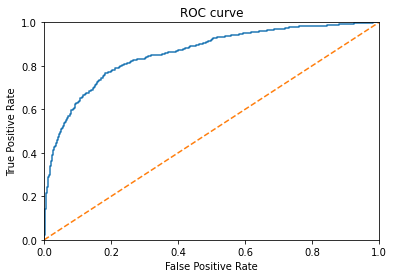

In [38]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
# set the boundary for the axes from 0 to 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# name the axes "False Positive Rate" and "True Positive Rate" 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# add the heading "ROC curve" 
plt.title('ROC curve')
plt.show()

In [39]:
# Save model
dump(model_RandomForest, 'model_RandomForest.joblib')

['model_RandomForest.joblib']

**Description**

This model we tested has an **accuracy of (0.8208)**.

## 7. Summary

1. The original data is very imbalanced. When we train it with different models (DecisionTreeClassifier, RandomForestClassifier, LogisticRegression), ***RandomForestClassifier*** with *random_state = 12345*, *n_estimators = 90* and *max_depth = 14* has the best performance -- **F1 Score (0.5680473372781064)**.

2. When we adjust the balance of the data and train it with different models (DecisionTreeClassifier, RandomForestClassifier, LogisticRegression), the ***RandomForestClassifier*** model trained with *upsampled data* with *random_state = 12345*, *n_estimators = 100* and *max_depth = 8* has the best performance -- **F1 Score (0.6235294117647059)**.

3. When trained with the same models using the same arguments (random_state, n_estimators, max_depth, solver ... etc), the models trained with **balanced** data have *higher F1 Score values*, thus *better performance*.